In [212]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse as sps
from scipy.sparse import csr_matrix

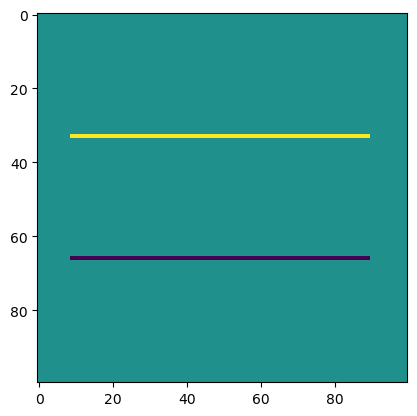

In [213]:
n = 100     #formerly grid_size
grid = np.zeros([n, n], dtype=int)

separation_factor = 2/3     # horizontal separation of the plates
vertical_aspect = 0.8   # amount of vertical grid_size taken up by plate

y1 = int(0.5*n*(1 - vertical_aspect))
y2 = int(0.5*n*(1 + vertical_aspect))
assert 0 <= separation_factor <= 1
assert 0 <= vertical_aspect <= 1
offset = int(separation_factor * (n//2))
grid[y1:y2, offset] = 1
grid[y1:y2, n-offset-1] = -1
plt.imshow(grid.T, cmap='viridis')
plt.show()

In [214]:
diags = np.array([np.ones(n*n) * -4, np.ones(n*n), np.ones(n*n), np.ones(n*n), np.ones(n*n)])
laplacian = sps.spdiags(diags, [0, 1, -1, n, -n], n*n, n*n)
b = csr_matrix(grid.flatten().astype(float)).reshape(-1, 1)
A = laplacian.copy().tocsc()
x = sps.linalg.spsolve(A, b) # solving the laplacian

In [215]:
potential = x.reshape(100, 100)
levels_pos = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1]) # determine levels to be shown for each "eye" on the contour plot
levels_neg = np.flip(levels_pos) * -1
levels = np.hstack([levels_neg, levels_pos]) * potential.max()

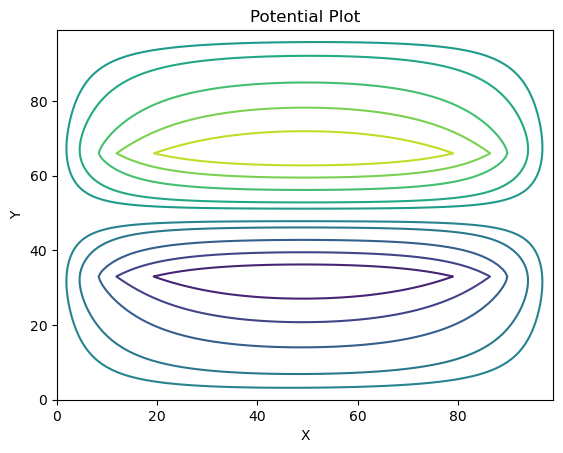

In [216]:
plt.contour(potential.T, cmap='viridis', levels=levels)
plt.title('Potential Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [217]:
def get_col_gradient(arr):
    assert arr.ndim == 2
    n = len(arr.T)
    grad = (np.pad(arr, ((0, 0), (0, 2))) - np.pad(arr, ((0, 0), (2, 0))))/2
    grad = grad[:, 1:n+1]
    fw_diff = arr[:, 1] - arr[:, 0]
    bw_diff = arr[:, n-1] - arr[:, n-2]
    grad[:, 0] = fw_diff
    grad[:, n-1] = bw_diff
    return grad

def get_row_gradient(arr):
    assert arr.ndim == 2
    n = len(arr)  # Now working with rows instead of columns
    grad = (np.pad(arr, ((0, 2), (0, 0))) - np.pad(arr, ((2, 0), (0, 0))))/2
    grad = grad[1:n+1, :]
    fw_diff = arr[1, :] - arr[0, :]
    bw_diff = arr[n-1, :] - arr[n-2, :]
    grad[0, :] = fw_diff
    grad[n-1, :] = bw_diff
    return grad

def gradient(arr):
    return (get_row_gradient(arr), get_col_gradient(arr))
